# 課題 Task10_1

### 1. パッケージをインポートする Import packages

In [180]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 2. 確率変数と確率分布をファイルから読み込む Load the R.V. and probability 
####  データファイル「rand_distribution.csv」をread_csv()を使って読み込んでください
####  ファイルの中身がどのような形式で書かれているか確認すること
#### Load the R.V. and probability from “rand_distribution.csv” by using read_csv() (column#1 is R.V. and column#2 is probability)

In [181]:
data = pd.read_csv("data/rand_distribution.csv", comment="#", names=["X", "P"], dtype={"X":np.int32, "P":np.float64})
data

,X,P
0,5,0.004439
1,6,0.008038
2,7,0.013674
3,8,0.021851
4,9,0.032802
5,10,0.046258
6,11,0.061282
7,12,0.076266
8,13,0.089164
9,14,0.097928


### 辞書型に変換 Create a dictionary from "data"

In [190]:
pre_dist = dict(data)
dist = dict(zip(pre_dist['X'],pre_dist['P'])) 

### 3. 棒グラフを使って確率分布を図示しなさい Plot the probability distribution by using a bar graph

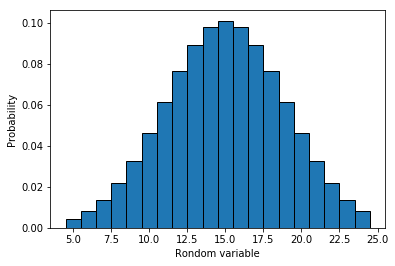

In [191]:
plt.bar(dist.keys(), dist.values(), width=1, ec='black' )
plt.xlabel("Rondom variable")
plt.ylabel("Probability")
plt.show()

### 4. 累積分布を定義しなさい Define a function of the CDF

In [192]:
def Cdf(dist, x):
    prob = 0.0
    for value in dist.keys():
        if value <= x:
            prob += dist[value]
    return prob

### 5. 累積分布を計算しなさい Calculate the CDF

In [193]:
cdf_dis ={}
for x in range(0,19):
    cdf = Cdf(dist, x)
    cdf_dis[x] = cdf

### 6. 累積分布を図示しなさい Plot the CDF

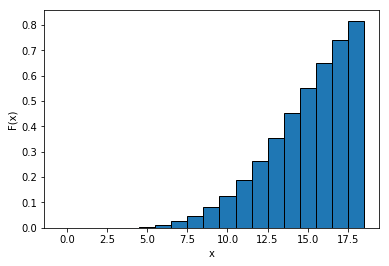

In [194]:
plt.bar(cdf_dis.keys(), cdf_dis.values(), width=1, ec='black' )
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

### 7. 期待値を求める関数を定義しなさい Define a function of expected value

In [195]:
def Expect(dist):
    e = sum([x*p for x,p in dist.items()])
    return e

### 8. 分散を求める関数を定義しなさい Define a function of variance

In [196]:
def Variance(dist):
    e = Expect(dist)
    var = sum([((x - e)**2)*p for x,p in dist.items()])
    return var

### 9. 標準偏差を求める関数を定義しなさい Define a function of standard deviation

In [197]:
def Std(dist):
    std = np.sqrt(Variance(dist))
    return std

### 10. 期待値、分散、標準偏差を求めなさい Calculate the expected value, variance and standard deviation

In [198]:
print("期待値(Expectation):{:.3f}".format(Expect(dist)))
print("分散(Variance):{:.3f}".format(Variance(dist)))
print("標準偏差(Standard deviation):{:.3f}".format(Std(dist)))

期待値(Expectation):14.956
分散(Variance):14.553
標準偏差(Standard deviation):3.815


### 11. 標準化変数を求める関数を定義しなさい Define a function of z-score normalization

In [199]:
def Zscore(dist):
    z = [(x - Expect(dist)) / Std(dist) for x in dist.keys()]
    normalized_dist = dict(zip(z, dist.values()))
    return normalized_dist

### 12. 標準化変数を求め、標準化後の期待値、分散、標準偏差を求めなさい Calculate the expected value, variance and standard deviation of the normalized probability distribution

In [200]:
z = Zscore(dist)
print("期待値(Expectation):{:.3f}".format(Expect(z)))
print("分散(Variance):{:.3f}".format(Variance(z)))
print("標準偏差(Standard deviation):{:.3f}".format(Std(z)))

期待値(Expectation):0.000
分散(Variance):1.000
標準偏差(Standard deviation):1.000


{-2.6096727295058182: 0.0044392270000000005,
 -2.3475417970559769: 0.0080384010000000006,
 -2.0854108646061356: 0.013673781000000001,
 -1.8232799321562947: 0.021850640000000001,
 -1.5611489997064536: 0.032801695999999998,
 -1.2990180672566125: 0.046257805999999999,
 -1.0368871348067714: 0.061281635999999994,
 -0.77475620235693021: 0.076266227999999991,
 -0.51262526990708912: 0.089164253999999998,
 -0.25049433745724797: 0.097927774999999995,
 0.011636594992593124: 0.10103633699999999,
 0.27376752744243421: 0.097927774999999995,
 0.53589845989227536: 0.089164253999999998,
 0.79802939234211645: 0.076266227999999991,
 1.0601603247919575: 0.061281635999999994,
 1.3222912572417986: 0.046257805999999999,
 1.5844221896916397: 0.032801695999999998,
 1.8465531221414808: 0.021850640000000001,
 2.1086840545913219: 0.013673781000000001,
 2.3708149870411632: 0.0080384010000000006}

### 13. 標準化変数を求め、標準化後の確率分布を図示しなさい Plot the normalized probability distribution

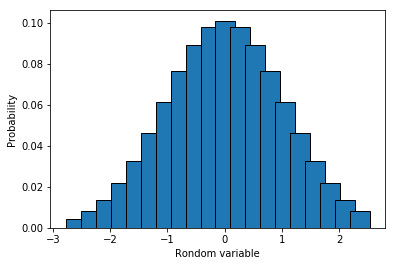

In [201]:
plt.bar(z.keys(), z.values(), width=0.34,ec='black' )
plt.xlabel("Rondom variable")
plt.ylabel("Probability")
plt.show()